# The Housing Dataset

This dataset contains information about houses in the Boston area collected in 1978. It is small, containing only 506 observations, and contains 14 variables. The dataset can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

## Variables

Drawing from the [University of Toronto's Computer Science](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) department, the 14 variables are:

1. **CRIM** - per capita crime rate by town
2. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS** - proportion of non-retail business acres per town.
4. **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX** - nitric oxides concentration (parts per 10 million)
6. **RM** - average number of rooms per dwelling
7. **AGE** - proportion of owner-occupied units built prior to 1940
8. **DIS** - weighted distances to five Boston employment centres
9. **RAD** - index of accessibility to radial highways
10. **TAX** - full-value property-tax rate per 10,000
11. **PTRATIO** - pupil-teacher ratio by town
12. **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT** - % lower status of the population
14. **MEDV** - Median value of owner-occupied homes in $1000's

The Toronto CS team notes that "**MEDV** seems to be censored at 50.00 (corresponding to a median price of 50,000); Censoring is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring."

## Loading the Data

In [2]:
import pandas as pd
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
# this url has no header info, so column names must be specified
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
            'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# load dataset into pandas
df = pd.read_csv(data_url, header=None, sep='\s+', names=colnames)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Let's explore some of these variables. It seems like there should definitely be a correlation between several of these variables. For example, I bet as home value increases (**MEDV**) so will the number of rooms (**RM**), but the crime rate (**CRIM**) will decrease. Other relationships might not be so intuitive. 

Let's compare seven of these variables, including the three mentioned, as well as nitric oxide concentration (**NOX**), the proportion of older (pre-1940s) houses (**AGE**), accessibility to highways (**RAD**), and the teacher to student ratio (**PTRATIO**).

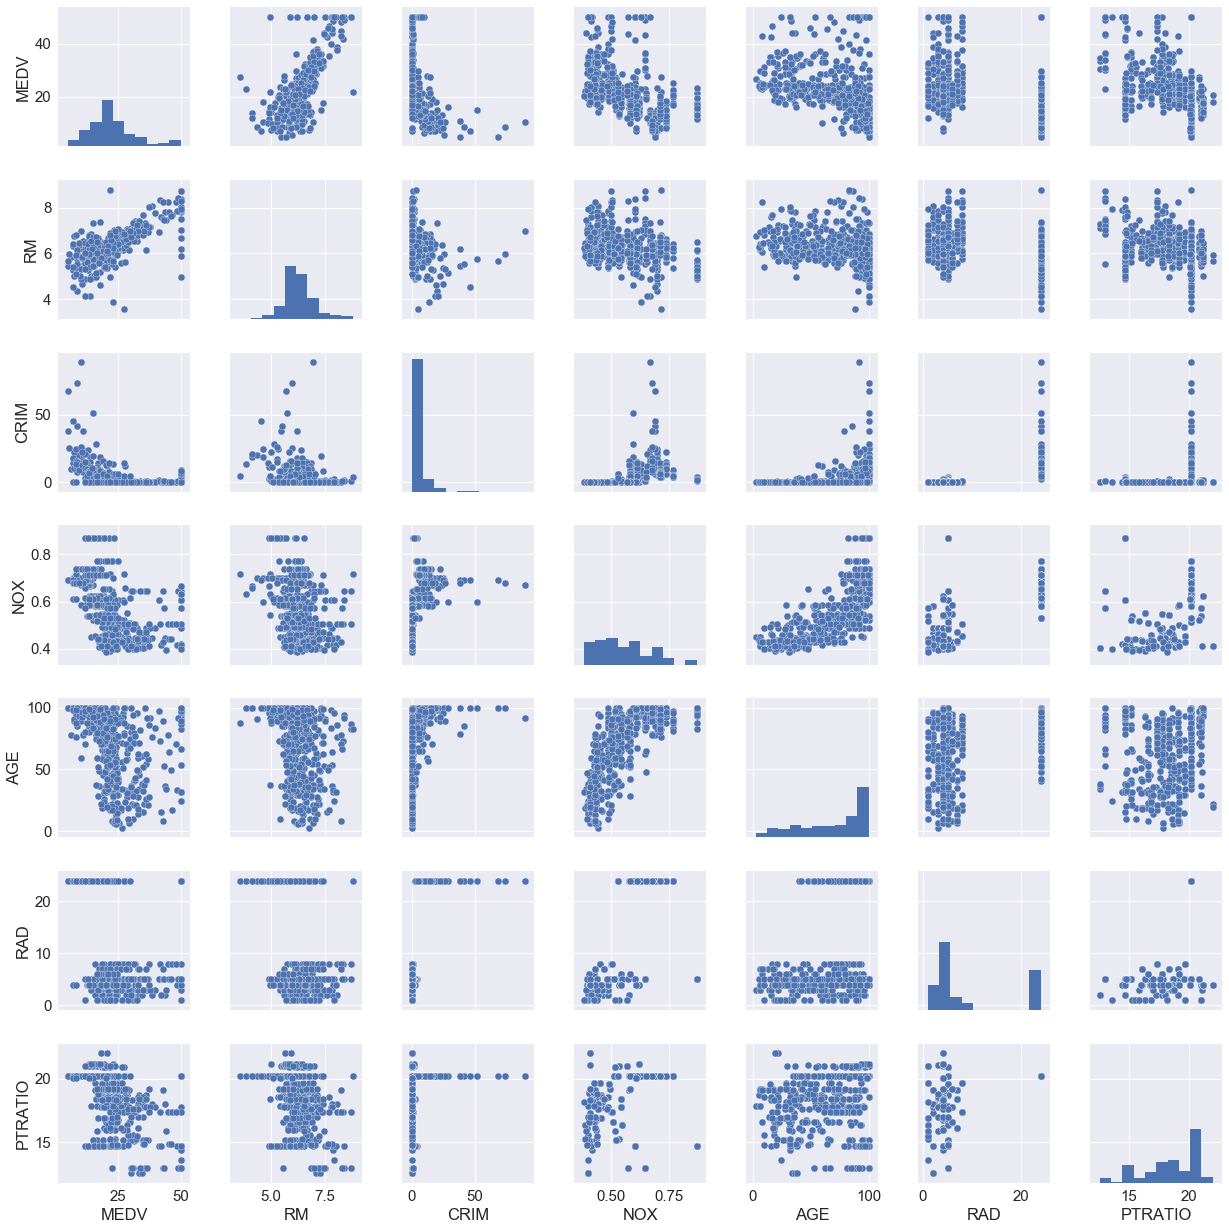

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Our seven columns of interest
cols = ['MEDV', 'RM', 'CRIM', 'NOX', 'AGE', 'RAD', 'PTRATIO']
sns.set(font_scale=1.5)
sns.pairplot(df[cols], size = 2.5)

A lot of information in this plot. However, the trends we supposed earlier appear to be valid. Other interesting trends are that nitric oxide concentration appears to be higher in areas with a larger share of older homes. Looks like all the crime happens where there are older homes and when the teacher/student ration is 1 to 20. Many of these relationships are pretty noisy. Let's check how these variables correlate with a heatmap.

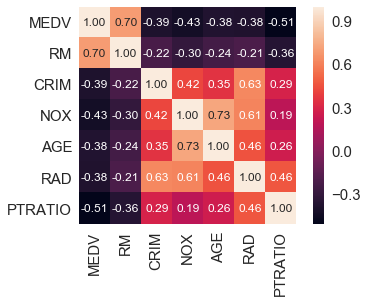

In [18]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size' : 12}, 
            yticklabels=cols, xticklabels=cols)